# Melhor Dia Para Vender Dólar

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from collections import defaultdict

In [4]:
dtypes = {'date': 'str', 'price': 'float'}
data = pd.read_csv('data.csv', dtype=dtypes, parse_dates=['date'])
data.head()

,date,price
0,2006-01-01,NaN
1,2006-01-02,2.3362
2,2006-01-03,2.3452
3,2006-01-04,2.3058
4,2006-01-05,2.2817


In [5]:
def getBestPerDayOfWeek(data):
    week = {0:0, 1:0, 2:0, 3:0, 4:0}
    weeks = {0:0, 1:0, 2:0, 3:0, 4:0}
    for idx, row in data.iterrows():
        date = row[0]
        if (date.weekday() == 0):
            week = {0:0, 1:0, 2:0, 3:0, 5:0, 6:0}
        if (row[1]): week[date.weekday()] = row[1]
        if (date.weekday() == 6):
            bestDay = max(week, key=week.get)
            weeks[bestDay] = weeks[bestDay] + 1

    return pd.DataFrame(weeks, index=[0])

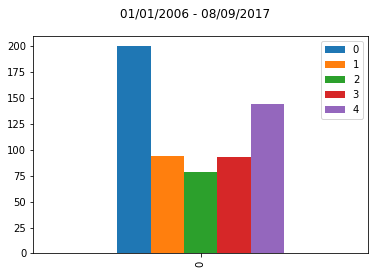

In [6]:
result = getBestPerDayOfWeek(data)
result.plot(kind='bar')
plt.suptitle(data.iloc[0]['date'].strftime('%d/%m%/%Y') + ' - ' + data.iloc[-1]['date'].strftime('%d/%m%/%Y'))

## Comparação por Ano

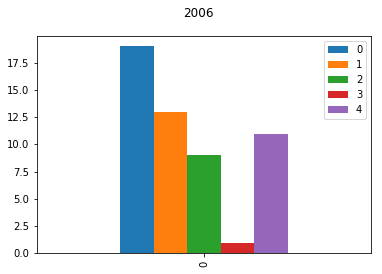

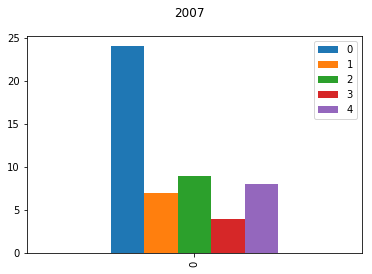

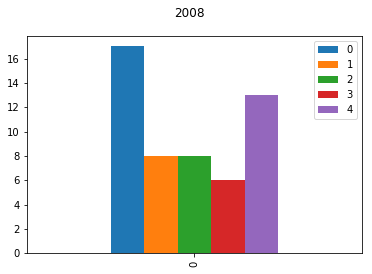

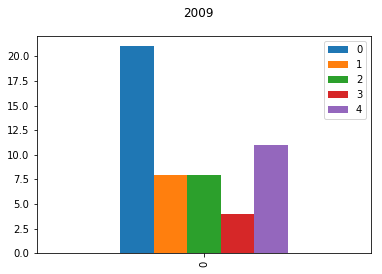

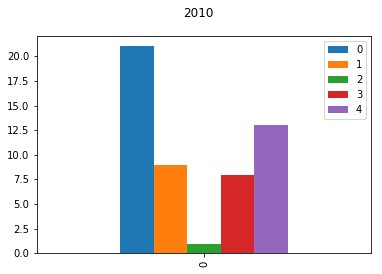

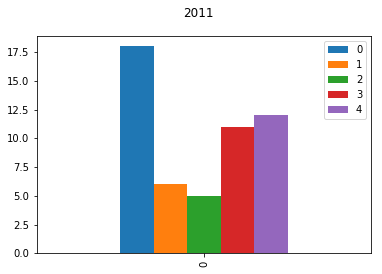

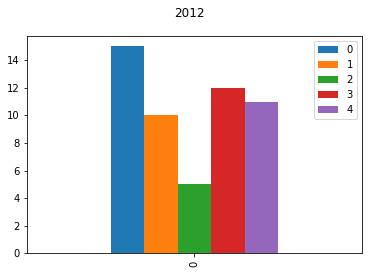

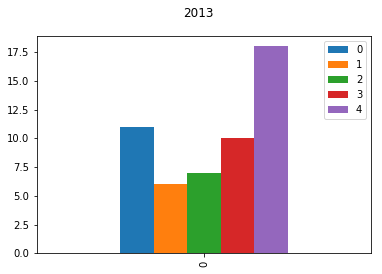

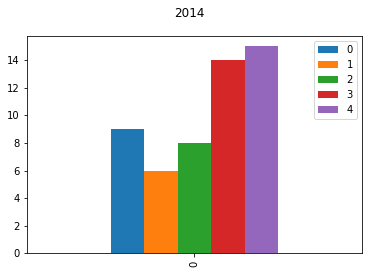

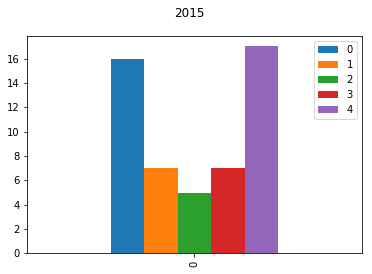

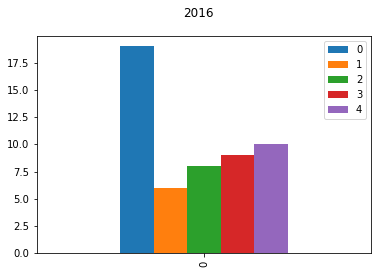

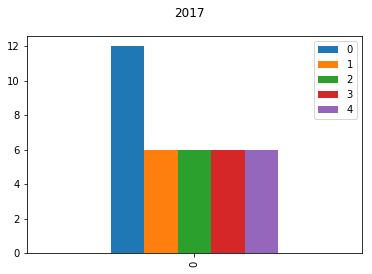

In [7]:
for year, yearDate in data.groupby(data['date'].map(lambda x: x.year)):
    result = getBestPerDayOfWeek(yearDate)
    result.plot(kind='bar')
    plt.suptitle(year)